# Disclaimer

This Jupyter notebook contains interactive plotly charts. Github performs a static render of the notebooks and it doesn't include the embedded HTML/JavaScript that makes up a plotly chart. Jupyter Notebook files with a .ipynb extension will render as static HTML files on GitHub. It means that interactive features of the notebook, such as interactive plotly plots, will not work. To view this Jupyter notebook with JavaScript content rendered you can use nbviewer: https://nbviewer.org. Just paste this link https://github.com/MaxTeselkin/Hotel-Customer-Segmentation/blob/main/Hotel_Customer_Segmentation.ipynb into nbviewer and everythink will be displayed correctly.

# Data description

This real-world customer dataset with 31 variables describes 83,590 customers from a hotel in Lisbon, Portugal. The data comprehends three full years of customer personal, behavioral, demographic, and geographical information.

This dataset contains the following columns:

**ID** - Customer ID

**Nationality** - Country of origin

**Age** - Customer's age (in years) at the last day of the extraction period.

**DaysSinceCreation** - Number of days since the customer record was created (number of days elapsed between the creation date and the last day of the extraction period).

**NameHash** - Name of the customer's SHA2–256 hash string. A hash-string is the string resulting from a mathematical function that maps a string of arbitrary length to fixed-length. Hash functions are used for different purposes. In this case, to allow customer's anonymization.

**DocIDHash** - SHA2–256 hash-string of the identification document number the customer provided at check-in (passport number, national ID card number, or other).

**AverageLeadTime** - The average number of days elapsed between the customer's booking date and arrival date. In other words, this variable is calculated by dividing the sum of the number of days elapsed between the moment each booking was made and its arrival date, by the total of bookings made by the customer.

**LodgingRevenue** - Total amount spent on lodging expenses by the customer (in Euros). This value includes room, crib, and other related lodging expenses.

**OtherRevenue** - Total amount spent on other expenses by the customer (in Euros). This value includes food, beverage, spa, and other expenses.

**BookingsCanceled** - Number of bookings the customer made but subsequently canceled (the customer informed the hotel he/she would not come to stay).

**BookingsNoShowed** - Number of bookings the customer made but subsequently made a “no-show” (did not cancel, but did not check-in to stay at the hotel).

**BookingsCheckedIn** - Number of bookings the customer made, and which end up with a staying.

**PersonsNights** - The total number of persons/nights that the costumer stayed at the hotel. This value is calculated by summing all customers checked-in bookings’ persons/nights. Person/nights of each booking is the result of the multiplication of the number of staying nights by the sum of adults and children.

**RoomNights** - Total of room/nights the customer stayed at the hotel (checked-in bookings). Room/nights are the multiplication of the number of rooms of each booking by the number of nights of the booking.

**DaysSinceLastStay** - The number of days elapsed between the last day of the extraction and the customer's last arrival date (of a checked-in booking). A value of −1 indicates the customer never stayed at the hotel.

**DaysSinceFirstStay** - The number of days elapsed between the last day of the extraction and the customer's first arrival date (of a checked-in booking). A value of −1 indicates the customer never stayed at the hotel.

**DistributionChannel** - Distribution channel usually used by the customer to make bookings at the hotel.

**MarketSegment** - Current market segment of the customer (market segmentation should not be confused with customer segmentation!)

**SRHighFloor** - Indication if the customer usually asks for a room on a higher floor (0: No, 1: Yes)

**SRLowFloor** - Indication if the customer usually asks for a room on a lower floor (0: No, 1: Yes).

**SRAccessibleRoom** - Indication if the customer usually asks for an accessible room (0: No, 1: Yes).

**SRMediumFloor** - Indication if the customer usually asks for a room on a middle floor (0: No, 1: Yes).

**SRBathtub** - Indication if the customer usually asks for a room with a bathtub (0: No, 1: Yes).

**SRShower** - Indication if the customer usually asks for a room with a shower (0: No, 1: Yes).

**SRCrib** - Indication if the customer usually asks for a crib (0: No, 1: Yes).

**SRKingSizeBed** - Indication if the customer usually asks for a room with a king-size bed (0: No, 1: Yes).

**SRTwinBed** - Indication if the customer usually asks for a room with a twin bed (0: No, 1: Yes).

**SRNearElevator** - Indication if the customer usually asks for a room near the elevator (0: No, 1: Yes).

**SRAwayFromElevator** - Indication if the customer usually asks for a room away from the elevator (0: No, 1: Yes).

**SRNoAlcoholInMiniBar** - Indication if the customer usually asks for a room with no alcohol in the mini-bar (0: No, 1: Yes).

**SRQuietRoom** - Indication if the customer usually asks for a room away from the noise (0: No, 1: Yes).

# Task

Let's perform clustering on this dataset in order to divide customers into segments.

**P.S.** If you have downloaded this notebook and view it via your computer, please make sure that this notebook is marked as "trusted" (if it's not marked as such, just click on button on the upper right corner). It is necessary because plotly charts will be displayed only if notebook is marked as "trusted" (otherwise they will be displayed as blank spaces).

In [70]:
import pandas as pd

df = pd.read_csv('HotelCustomersDataset.csv')
df

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,61,280.0,53.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...,0xE175754CF77247B202DD0820F49407C762C14A603B3A...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,83586,ITA,54.0,0,0x68010434A46BA6CEAFFACF00B7B7CD0E1825DC56E68F...,0x0A4038E9AE1E4E5A14832BEACEC6BCBE2219F275B65C...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
83586,83587,IRL,47.0,0,0x6DE7954E6AF065D29EF5C57D0DC8120FBAE6753D2CCB...,0xC0654B6A53840DD95DAE429966EC16E2A11FB186CC7B...,109,327.1,277.5,0,...,0,0,0,0,1,0,0,0,0,0
83587,83588,IRL,53.0,0,0x533C977BA6D1D8DFAD8D8D4C2250236D16EFD17B9F35...,0x3DCBEB254247836015CA95F0BBF42E6AF6A158380663...,0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
83588,83589,IRL,85.0,0,0x58B3CB1975F09BD89EDD4DED8F644D1CCBE6B29C10C7...,0xEB64E8E6820F421508B96820AA3BA49404C01D178FE3...,109,981.3,9.0,0,...,0,0,0,0,0,1,0,0,0,0


# Feature Engineering

In [71]:
# dropping unnecessary columns
df.drop(['ID', 'NameHash', 'DocIDHash'], axis=1, inplace=True)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Nationality           83590 non-null  object 
 1   Age                   79811 non-null  float64
 2   DaysSinceCreation     83590 non-null  int64  
 3   AverageLeadTime       83590 non-null  int64  
 4   LodgingRevenue        83590 non-null  float64
 5   OtherRevenue          83590 non-null  float64
 6   BookingsCanceled      83590 non-null  int64  
 7   BookingsNoShowed      83590 non-null  int64  
 8   BookingsCheckedIn     83590 non-null  int64  
 9   PersonsNights         83590 non-null  int64  
 10  RoomNights            83590 non-null  int64  
 11  DaysSinceLastStay     83590 non-null  int64  
 12  DaysSinceFirstStay    83590 non-null  int64  
 13  DistributionChannel   83590 non-null  object 
 14  MarketSegment         83590 non-null  object 
 15  SRHighFloor        

In [73]:
# choosing categorial features which contain text in columns (we are going to replace them with binary variables)
categorical_features = [column for column in df.columns if df[column].dtype == 'object']
categorical_features

['Nationality', 'DistributionChannel', 'MarketSegment']

In [74]:
for column in categorical_features:
    print('Column \'{}\' contains {} unique values'.format(column, df[column].nunique()))

Column 'Nationality' contains 188 unique values
Column 'DistributionChannel' contains 4 unique values
Column 'MarketSegment' contains 7 unique values


As we can see, we have a high-cardinality column ('cardinality' means the number of unique values in a column) - 'Nationality'. It means that we can't preprocess it with simple one-hot encoding since it will cause the curse of dimensionality. Column 'MarketSegment' is also not very suitable for one-hot encoding.

Let's reduce the cardinality of 'Nationality' and 'MarketSegment' columns.

For that purpose we will write a function that chooses the most frequent categories for each high-cardinality column and replaces all other (less frequent) categories with 'Other'.

In [75]:
def reduce_cardinality(df, column, threshold=0.5):
    limit = int(threshold * len(df[column]))
    counter = 0
    most_frequent = []
    categories = [category for category in df[column].value_counts().index if category != 'Other']
    for category in categories:
        counter += df[column].value_counts()[category]
        if counter <= limit:
            most_frequent.append(category)
        else:
            break
    df[column] = df[column].apply(lambda x: x if x in most_frequent else 'Other')
    return df[column]

In [76]:
df['Nationality'] = reduce_cardinality(df, 'Nationality')
df['Nationality'].unique()

array(['PRT', 'DEU', 'FRA', 'Other'], dtype=object)

In [77]:
df['MarketSegment'] = reduce_cardinality(df, 'MarketSegment', threshold=0.4)
df['MarketSegment'].unique()

array(['Other', 'Travel Agent/Operator', 'Direct', 'Groups'], dtype=object)

After we successfully reduced cardinality, let's perform one-hot encoding on categorical features.

In [78]:
# Performing one-hot encoding on categorical features
encoded_categorical = pd.get_dummies(df[categorical_features])

# Since one-hot encoding removed index, we should put it back
encoded_categorical.index = df.index

# Since categorical columns will be replaced with one-hot encoding, we should remove them
numerical = df.drop(categorical_features, axis=1)

# Let's add one-hot encoded columns to numerical features
df = pd.concat([numerical, encoded_categorical], axis=1)
df

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,Nationality_Other,Nationality_PRT,DistributionChannel_Corporate,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator
0,51.0,150,45,371.0,105.3,1,0,3,8,5,...,0,1,1,0,0,0,0,0,1,0
1,NaN,1095,61,280.0,53.0,0,0,1,10,5,...,0,1,0,0,0,1,0,0,0,1
2,31.0,1095,0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,60.0,1095,93,240.0,60.0,0,0,1,10,5,...,0,0,0,0,0,1,0,0,0,1
4,51.0,1095,0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,54.0,0,0,0.0,0.0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
83586,47.0,0,109,327.1,277.5,0,0,1,6,3,...,1,0,0,0,0,1,0,0,1,0
83587,53.0,0,0,0.0,0.0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
83588,85.0,0,109,981.3,9.0,0,0,1,6,3,...,1,0,0,0,0,1,0,0,1,0


# Data Cleaning

In [79]:
# checking number of missing values
df.isna().sum()

Age                                            3779
DaysSinceCreation                                 0
AverageLeadTime                                   0
LodgingRevenue                                    0
OtherRevenue                                      0
BookingsCanceled                                  0
BookingsNoShowed                                  0
BookingsCheckedIn                                 0
PersonsNights                                     0
RoomNights                                        0
DaysSinceLastStay                                 0
DaysSinceFirstStay                                0
SRHighFloor                                       0
SRLowFloor                                        0
SRAccessibleRoom                                  0
SRMediumFloor                                     0
SRBathtub                                         0
SRShower                                          0
SRCrib                                            0
SRKingSizeBe

As we can see, 'Age' column contains missing values. Let's impute them using KNNImputer class - imputation technique for handling missing values using k-Nearest Neighbors. Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set.

In [80]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,Nationality_Other,Nationality_PRT,DistributionChannel_Corporate,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator
0,51.0,150.0,45.0,371.0,105.3,1.0,0.0,3.0,8.0,5.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,45.8,1095.0,61.0,280.0,53.0,0.0,0.0,1.0,10.0,5.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,31.0,1095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,60.0,1095.0,93.0,240.0,60.0,0.0,0.0,1.0,10.0,5.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,51.0,1095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
83586,47.0,0.0,109.0,327.1,277.5,0.0,0.0,1.0,6.0,3.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
83587,53.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
83588,85.0,0.0,109.0,981.3,9.0,0.0,0.0,1.0,6.0,3.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [82]:
# transforming data into 'int32' type
df = df.astype('int32')
df

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,Nationality_Other,Nationality_PRT,DistributionChannel_Corporate,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator
0,51,150,45,371,105,1,0,3,8,5,...,0,1,1,0,0,0,0,0,1,0
1,45,1095,61,280,53,0,0,1,10,5,...,0,1,0,0,0,1,0,0,0,1
2,31,1095,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,60,1095,93,240,60,0,0,1,10,5,...,0,0,0,0,0,1,0,0,0,1
4,51,1095,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,54,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
83586,47,0,109,327,277,0,0,1,6,3,...,1,0,0,0,0,1,0,0,1,0
83587,53,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
83588,85,0,109,981,9,0,0,1,6,3,...,1,0,0,0,0,1,0,0,1,0


In [86]:
# checking if there are any missing values left
df.isna().sum()

Age                                            0
DaysSinceCreation                              0
AverageLeadTime                                0
LodgingRevenue                                 0
OtherRevenue                                   0
BookingsCanceled                               0
BookingsNoShowed                               0
BookingsCheckedIn                              0
PersonsNights                                  0
RoomNights                                     0
DaysSinceLastStay                              0
DaysSinceFirstStay                             0
SRHighFloor                                    0
SRLowFloor                                     0
SRAccessibleRoom                               0
SRMediumFloor                                  0
SRBathtub                                      0
SRShower                                       0
SRCrib                                         0
SRKingSizeBed                                  0
SRTwinBed           

In [84]:
# saving dataframe with encoded categorical features and imputed missing values
# df.to_csv('hotel_enc_imp.csv', index=False)

Most clustering algotithms are based on measures of how far apart data points are, so we need to change the range of our data in order to help our clustering model compare different variables on equal basis.

In [93]:
from sklearn.preprocessing import StandardScaler

# to choose only numerical columns we will exclude all binary variables (because they are used for categorical columns)
numerical_columns = [column for column in df if df[column].nunique() > 2]

# scaling of numerical columns
scaler = StandardScaler()
df[numerical_columns] = pd.DataFrame(scaler.fit_transform(df[numerical_columns]), index=df.index, columns=numerical_columns)
df

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,Nationality_Other,Nationality_PRT,DistributionChannel_Corporate,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator
0,0.344536,-0.968896,-0.241527,0.194050,0.328304,14.946614,-0.02146,3.169686,0.733609,1.157658,...,0,1,1,0,0,0,0,0,1,0
1,-0.022693,2.046531,-0.059208,-0.050045,-0.126763,-0.030280,-0.02146,0.295187,1.171472,1.157658,...,0,1,0,0,0,1,0,0,0,1
2,-0.879560,2.046531,-0.754298,-0.801107,-0.590583,-0.030280,-0.02146,-1.142062,-1.017840,-1.033660,...,0,0,0,0,0,1,0,0,0,1
3,0.895379,2.046531,0.305429,-0.157340,-0.065504,-0.030280,-0.02146,0.295187,1.171472,1.157658,...,0,0,0,0,0,1,0,0,0,1
4,0.344536,2.046531,-0.754298,-0.801107,-0.590583,-0.030280,-0.02146,-1.142062,-1.017840,-1.033660,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,0.528150,-1.447536,-0.754298,-0.801107,-0.590583,-0.030280,-0.02146,-1.142062,-1.017840,-1.033660,...,1,0,0,0,0,1,0,0,1,0
83586,0.099716,-1.447536,0.487748,0.076026,1.833529,-0.030280,-0.02146,0.295187,0.295747,0.281130,...,1,0,0,0,0,1,0,0,1,0
83587,0.466945,-1.447536,-0.754298,-0.801107,-0.590583,-0.030280,-0.02146,-1.142062,-1.017840,-1.033660,...,1,0,0,0,0,1,0,0,1,0
83588,2.425498,-1.447536,0.487748,1.830292,-0.511821,-0.030280,-0.02146,0.295187,0.295747,0.281130,...,1,0,0,0,0,1,0,0,1,0


# Dimensionality Reduction

Even after all cardinality reducing operations for categorical features our dataset contains only 83590 rows and at the same time 37 variables. To avoid the curse of dimensionality it is necessary to reduce the number of dimensions in our dataset.

For that purpose, let's perform Principal Component Analysis (PCA).

In [94]:
from sklearn.decomposition import PCA

# by n_components=0.9 parameter we will make our PCA model explain 90% of variance in dataset
pca = PCA(n_components=0.9, random_state=42)
pca.fit(df)

# setting column names for principal components
components = ['Component_%s' % i for i in range(1, len(pca.components_)+1)]

# transforming data
reduced_df = pd.DataFrame(pca.transform(df), columns=components)
reduced_df

,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,Component_9,Component_10,Component_11
0,3.520891,4.145291,9.983074,1.589786,5.173331,6.456110,4.006414,-1.492801,-1.682461,-3.614102,0.734792
1,3.039224,-2.142188,0.281745,-0.612989,0.076562,-0.051142,-0.462560,0.450998,0.696643,-0.861628,0.505551
2,-2.019348,-1.188819,0.453989,-0.587052,-0.063205,-0.266492,0.598122,0.240048,0.065416,-0.836393,0.934957
3,3.209514,-2.169139,0.047362,0.293175,-0.141006,0.105119,-0.481441,0.317096,0.752986,-1.045979,0.559936
4,-1.874418,-1.261782,0.333051,0.280301,-0.636965,0.264406,0.406301,0.187428,0.113039,-0.918859,1.016419
...,...,...,...,...,...,...,...,...,...,...,...
83585,-2.965480,0.469479,-0.016591,0.616279,-0.520620,0.382298,-0.114304,-0.480220,-0.141393,-0.115938,-0.256272
83586,-0.346076,2.345266,-0.850861,0.361245,-0.229748,-0.023321,1.047741,-0.762119,0.574084,0.608458,-0.658938
83587,-2.971808,0.490096,-0.008786,0.552967,-0.499881,0.363752,-0.158019,-0.789941,-0.108891,-0.039052,-0.344467
83588,-0.179217,2.266576,-0.897360,2.026786,-0.644139,0.872720,-1.331392,-0.202414,-1.297142,0.332620,0.259918


# Choosing optimal number of clusters and model training

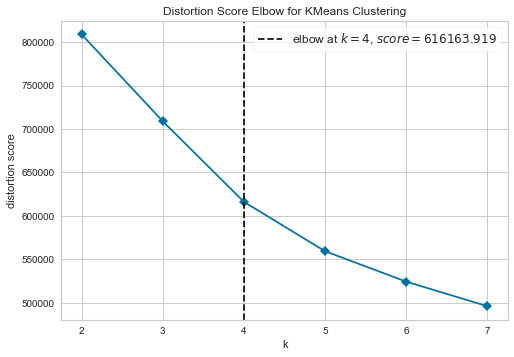

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42)
# visualizer for elbow method of choosing optimal number of clusters
elbow_method = KElbowVisualizer(model, k=(2, 8), timings=False)
elbow_method.fit(reduced_df)
elbow_method.show()

As we can see, the optimal number of clusters is 4. Now let's train KMeans clustering model and check the results.

In [12]:
clustering_model = KMeans(n_clusters=4, random_state=42)
clustering_model.fit(reduced_df)
clusters = clustering_model.predict(reduced_df)

In [1]:
# adding cluster labels to scaled and reduced dataframes
# df['clusters'] = clusters
# reduced_df['clusters'] = clusters

In [2]:
# saving dataframe with reduced fimesnions and scaled dataframe to csv files
# reduced_df.to_csv('reduced_hotel.csv', index=False)
# df.to_csv('scaled_hotel.csv', index=False)

# Evaluation of model performance

In [100]:
from sklearn.metrics import silhouette_score

score = silhouette_score(reduced_df, clusters)
print('Silhouette_score: {}'.format(score))

Silhouette_score: 0.2798585641458274


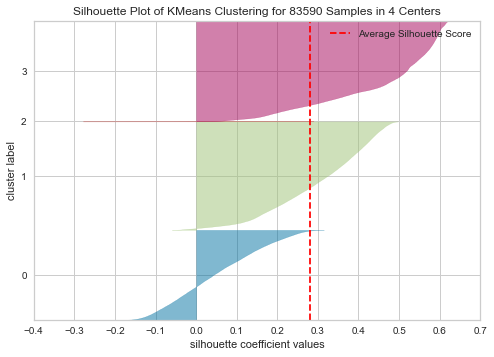

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 83590 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [13]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(clustering_model, colors='yellowbrick')
visualizer.fit(reduced_df)
visualizer.show()

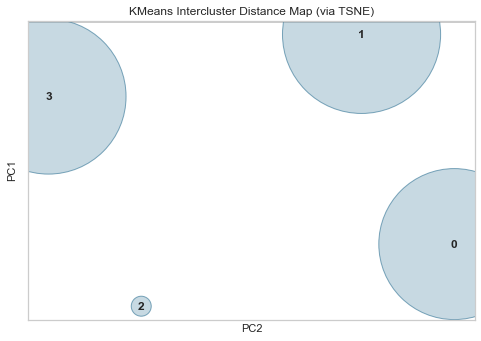

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via TSNE)'}, xlabel='PC2', ylabel='PC1'>

In [28]:
from yellowbrick.cluster import InterclusterDistance 
 
visualizer = InterclusterDistance(clustering_model, legend=False, embedding='tsne', random_state=42) 
 
visualizer.fit(reduced_df) 
visualizer.show()

**Model performance results analysis**

Silhouette score (this measure has a range of [-1, 1]) is 0.28 and it's acceptable (score near 1 indicates tight clusters, score of 0 indicates overlapping clusters and negative score indicates that those samples might have been assigned to the wrong cluster).

Silhouette plot shows that there are no clusters with below average silhouette scores (which is also a sign that our model performed not bad), but there is a very small cluster (label 2) which is even difficult to notice. We can see how small this cluster in comparison with other clusters on Intercluster Distance Map. Perhaps outliers belong to this cluster (we will check this hypothesis during interpretation of results). However, its silhouette score is above average, so this small cluster does not reduce model performance significantly.

Based on the information above, it can be concluded that our clustering model performed good enough to make conclusions based on its predictions.

# Visualization and interpretation of results

In [1]:
import pandas as pd

scaled_df = pd.read_csv('scaled_hotel.csv')
scaled_df

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,Nationality_PRT,DistributionChannel_Corporate,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator,clusters
0,0.344536,-0.968896,-0.241527,0.194050,0.328304,14.946614,-0.02146,3.169686,0.733609,1.157658,...,1,1,0,0,0,0,0,1,0,0
1,-0.022693,2.046531,-0.059208,-0.050045,-0.126763,-0.030280,-0.02146,0.295187,1.171472,1.157658,...,1,0,0,0,1,0,0,0,1,1
2,-0.879560,2.046531,-0.754298,-0.801107,-0.590583,-0.030280,-0.02146,-1.142062,-1.017840,-1.033660,...,0,0,0,0,1,0,0,0,1,3
3,0.895379,2.046531,0.305429,-0.157340,-0.065504,-0.030280,-0.02146,0.295187,1.171472,1.157658,...,0,0,0,0,1,0,0,0,1,1
4,0.344536,2.046531,-0.754298,-0.801107,-0.590583,-0.030280,-0.02146,-1.142062,-1.017840,-1.033660,...,0,0,0,0,1,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,0.528150,-1.447536,-0.754298,-0.801107,-0.590583,-0.030280,-0.02146,-1.142062,-1.017840,-1.033660,...,0,0,0,0,1,0,0,1,0,3
83586,0.099716,-1.447536,0.487748,0.076026,1.833529,-0.030280,-0.02146,0.295187,0.295747,0.281130,...,0,0,0,0,1,0,0,1,0,0
83587,0.466945,-1.447536,-0.754298,-0.801107,-0.590583,-0.030280,-0.02146,-1.142062,-1.017840,-1.033660,...,0,0,0,0,1,0,0,1,0,3
83588,2.425498,-1.447536,0.487748,1.830292,-0.511821,-0.030280,-0.02146,0.295187,0.295747,0.281130,...,0,0,0,0,1,0,0,1,0,0


Let's visualize clustering results by building charts for numerical and categorical features with division by clusters.

In [2]:
numerical = [column for column in scaled_df if scaled_df[column].nunique() > 2 or column == 'clusters']
categorical = [column for column in scaled_df if scaled_df[column].nunique() == 2 or column == 'clusters']

In [3]:
# create dataframe with mean values
means = scaled_df.groupby('clusters').mean()
means

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,Nationality_Other,Nationality_PRT,DistributionChannel_Corporate,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator
clusters,,,,,,,,,,,,,,,,,,,,,
0,0.182846,-0.420567,0.631706,0.756192,0.551430,-0.002300,-0.021460,0.384822,0.790200,0.741466,...,0.632363,0.074052,0.018642,0.127395,0.003498,0.850465,0.126958,0.139478,0.590031,0.143533
1,0.133999,1.053921,0.068368,-0.028446,0.025229,-0.012496,-0.021460,0.321877,0.139784,0.145855,...,0.537437,0.186688,0.040207,0.119962,0.005145,0.834686,0.113365,0.113662,0.609440,0.163533
2,0.315026,0.717737,-0.501168,3.300563,1.533484,18.958282,32.011978,14.796007,3.227861,7.755090,...,0.214286,0.750000,0.803571,0.142857,0.000000,0.053571,0.107143,0.000000,0.839286,0.053571
3,-0.309368,-0.763146,-0.639289,-0.653884,-0.524757,-0.022273,-0.021460,-0.722382,-0.866013,-0.837912,...,0.610307,0.143702,0.030900,0.180412,0.009445,0.779243,0.171787,0.090741,0.627058,0.110414


In [6]:
# Jupyter Notebook sometimes suffers from a problem whereby
# if you close the window and reopen it, your plots render as blank spaces.
# The following code should restore all plotly charts
import plotly.io as pio
pio.renderers.default='notebook'

The following code will build to radar charts - one for clusters 0, 1, 3 and the other for cluster 2. I've decided to build separate chart for cluster 2 because this cluster has anomaly big values and due to that chart lines for clusters 0, 1, 3 will be too small to detect any patterns if we will use one common radar chart for all clusters.

In [9]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

categories = numerical[:-1]

fig = make_subplots(rows=2, cols=1, specs=[[{'type': 'polar'}],
                                           [{'type': 'polar'}]])

fig.add_trace(go.Scatterpolar(
    r=means[categories].loc[0].values,
    theta=categories,
    name='Cluster 0'),
    row=1, col=1)

fig.add_trace(go.Scatterpolar(
    r=means[categories].loc[1].values,
    theta=categories,
    name='Cluster 1'),
    row=1, col=1)

fig.add_trace(go.Scatterpolar(
    r=means[categories].loc[2].values,
    theta=categories,
    name='Cluster 2'),
    row=2, col=1)

fig.add_trace(go.Scatterpolar(
    r=means[categories].loc[3].values,
    theta=categories,
    name='Cluster 3'),
    row=1, col=1)

fig.update_layout(margin=dict(l=25, r=25, t=25, b=25),
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-2, 2]
    )),
  showlegend=True
)

fig.show()

Customers that belong to **cluster 0** prefer early booking (this cluster has the biggest "AverageLeadTime" value - the average number of days elapsed between the customer's booking date and arrival date), spend more money on lodging (includes room, crib, etc.) and other (food, beverage, spa, etc.) expenses and book more nights than customers from clusters 1, 3 (but less than customers from cluster 2).

Customers that belong to **cluster 1** have been clients of the hotel for a long time (because this cluster has the biggest "DaysSinceCreation" value - number of days since the customer record was created), usually spend less money on lodging and other expenses in comparison with cluster 0 and haven't made any bookings for a long time (because this cluster has the biggest "DaysSinceLastDay" value - the number of days elapsed between the last day of the extraction and the customer's last arrival date).

We can surely conclude that **cluster 2** consists of outliers. The category "BookingsNoShowed" stands out especially. - This category stands for number of bookings the customer made but subsequently made a “no-show” (did not cancel, but did not check-in to stay at the hotel). Also customers that belong to the second cluster make a lot of canceled bookings (the customer informed the hotel he/she would not come to stay). However, at the same time customers from cluster 2 make the most checked-in bookings (which end up with a staying). And cluster 2 is a leader in "PersonsNights" (the multiplication of the number of staying nights by the sum of adults and children) and "RoomNights" (the multiplication of the number of rooms of each booking by the number of nights of the booking) categories. One more important observation is that customers from the second cluster spend more money on lodging and other expenses. So despite the fact that very few customers belong to cluster 2, this customers are very valuable for this hotel.

Customers that belong to **cluster 3** usually spend less money on lodging and other expenses than all other clusters, make less bookings (this cluster has the lowest "BookingsCheckedIn" value), book few nights and prefer late booking (this cluster has the lowest "AverageLeadTime" value).

One more interesting observation is that clusters 0, 1, 3 have almost equal "BookingsNoShowed" and "BookingsCanceled" values - perhaps it is typical share of canceled bookings in hotel business, but cluster 2 has completely different values for these category. Let's continue our research and build some plots for categorical features and take a closer look on age of customers in order to get more information about these clusters.

In [17]:
# a dataframe with mean values for categorical features in order to make plots building simplier
means_cat = means[categorical[:-1]]
means_cat

,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,...,Nationality_Other,Nationality_PRT,DistributionChannel_Corporate,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator
clusters,,,,,,,,,,,,,,,,,,,,,
0,0.049209,0.001749,0.000318,0.000874,0.003697,0.002703,0.010653,0.363900,0.156292,0.000556,...,0.632363,0.074052,0.018642,0.127395,0.003498,0.850465,0.126958,0.139478,0.590031,0.143533
1,0.041494,0.001055,0.000363,0.000957,0.001979,0.001220,0.008015,0.341085,0.132199,0.000231,...,0.537437,0.186688,0.040207,0.119962,0.005145,0.834686,0.113365,0.113662,0.609440,0.163533
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.607143,0.125000,0.000000,...,0.214286,0.750000,0.803571,0.142857,0.000000,0.053571,0.107143,0.000000,0.839286,0.053571
3,0.052498,0.001497,0.000071,0.000784,0.003029,0.001354,0.021170,0.354658,0.141421,0.000249,...,0.610307,0.143702,0.030900,0.180412,0.009445,0.779243,0.171787,0.090741,0.627058,0.110414


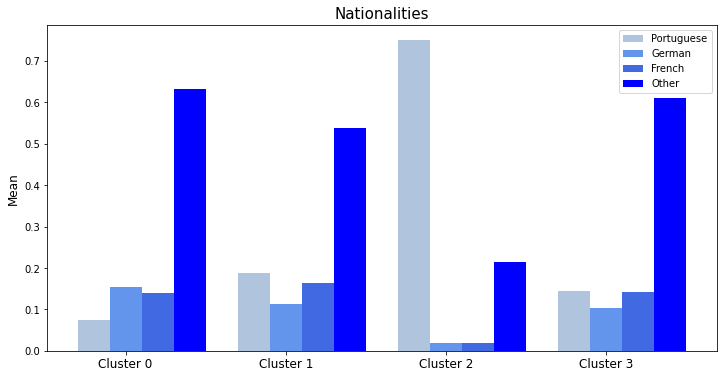

In [8]:
# a histogram with division by nationality
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
# width of the bars
barwidth = 0.2

# height of the bars
y_prt = means_cat['Nationality_PRT']
y_deu = means_cat['Nationality_DEU']
y_fra = means_cat['Nationality_FRA']
y_other = means_cat['Nationality_Other']

bars = means_cat.index

# The x position of bars
x_prt = np.arange(len(bars))
x_deu = [x + barwidth for x in x_prt]
x_fra = [x + barwidth for x in x_deu]
x_other = [x + barwidth for x in x_fra]

# Create bars
plt.bar(x_prt, y_prt, width=barwidth, label='Portuguese', color='lightsteelblue')
plt.bar(x_deu, y_deu, width=barwidth, label='German', color='cornflowerblue')
plt.bar(x_fra, y_fra, width=barwidth, label='French', color='royalblue')
plt.bar(x_other, y_other, width=barwidth, label='Other', color='blue')

# Create names on the x-axis
plt.xticks([x + barwidth for x in range(len(y_prt))], ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'], fontsize=12)

plt.title('Nationalities', fontsize=15)
plt.ylabel('Mean', fontsize=12)
plt.legend()
 
# Show graphic
plt.show()

Here comes one more important fact - customers that belong to the second cluster are in the majority Portuguese, while other custers are mostly multinational. If we take into account that our hotel is located in Lisbon, Portugal, then it can be concluded that cluster 2 consists mainly of local citizens.

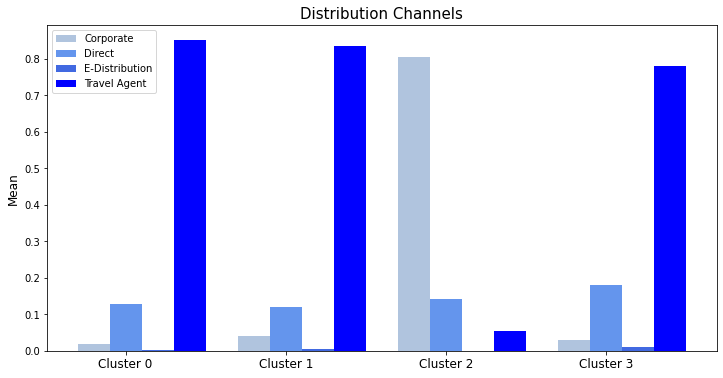

In [9]:
# a histogram with division by distribution channel
plt.figure(figsize=(12, 6))
# width of the bars
barwidth = 0.2

# height of the bars
y_corporate = means_cat['DistributionChannel_Corporate']
y_direct = means_cat['DistributionChannel_Direct']
y_electronic = means_cat['DistributionChannel_Electronic Distribution']
y_agent = means_cat['DistributionChannel_Travel Agent/Operator']

bars = means_cat.index

# The x position of bars
x_corporate = np.arange(len(bars))
x_direct = [x + barwidth for x in x_corporate]
x_electronic = [x + barwidth for x in x_direct]
x_agent = [x + barwidth for x in x_electronic]

# Create bars
plt.bar(x_corporate, y_corporate, width=barwidth, label='Corporate', color='lightsteelblue')
plt.bar(x_direct, y_direct, width=barwidth, label='Direct', color='cornflowerblue')
plt.bar(x_electronic, y_electronic, width=barwidth, label='E-Distribution', color='royalblue')
plt.bar(x_agent, y_agent, width=barwidth, label='Travel Agent', color='blue')

# Create names on the x-axis
plt.xticks([x + barwidth for x in range(len(y_corporate))], ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'], fontsize=12)

plt.title('Distribution Channels', fontsize=15)
plt.ylabel('Mean', fontsize=12)
plt.legend(loc='upper left')
 
# Show graphic
plt.show()

As displayed on the histogram above, customers from clusters 0, 1, 3 usually make bookings via travel agents, while customers from cluster 2 prefer corporate bookings. Businesses and organizations can use corporate bookings for their corporate travel needs.

Now let's take a closer look on the age of hotel's customers. For that purpose we will use imputed dataframe (which was not scaled)

In [11]:
imp_df = pd.read_csv('hotel_enc_imp.csv')
imp_df['clusters'] = scaled_df['clusters']
imp_df

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,Nationality_PRT,DistributionChannel_Corporate,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator,clusters
0,51,150,45,371,105,1,0,3,8,5,...,1,1,0,0,0,0,0,1,0,0
1,45,1095,61,280,53,0,0,1,10,5,...,1,0,0,0,1,0,0,0,1,1
2,31,1095,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,3
3,60,1095,93,240,60,0,0,1,10,5,...,0,0,0,0,1,0,0,0,1,1
4,51,1095,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,54,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,3
83586,47,0,109,327,277,0,0,1,6,3,...,0,0,0,0,1,0,0,1,0,0
83587,53,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,3
83588,85,0,109,981,9,0,0,1,6,3,...,0,0,0,0,1,0,0,1,0,0


In [16]:
means_age = imp_df[['Age', 'clusters']].groupby('clusters').mean()
means_age

,Age
clusters,
0,48.358216
1,47.560129
2,50.517857
3,40.316131


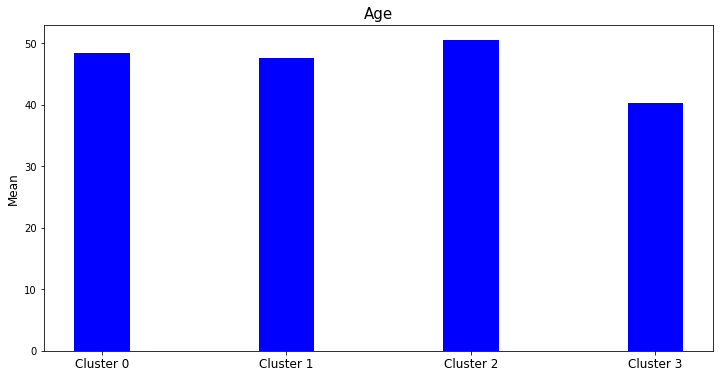

In [21]:
# a histogram with division by floor type
plt.figure(figsize=(12, 6))
# width of the bars
barwidth = 0.3

# height of the bars
y_age = means_age['Age']

bars = means_age.index

# The x position of bars
x_age = np.arange(len(bars))

# Create bars
plt.bar(x_age, y_age, width=barwidth, color='blue')

# Create names on the x-axis
plt.xticks([x for x in range(len(y_age))], ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'], fontsize=12)

plt.title('Age', fontsize=15)
plt.ylabel('Mean', fontsize=12)
 
# Show graphic
plt.show()

It can be concluded that there is no significant difference in age of cutomers from different clusters. Most of the hotel's customers are 40-50 years old.

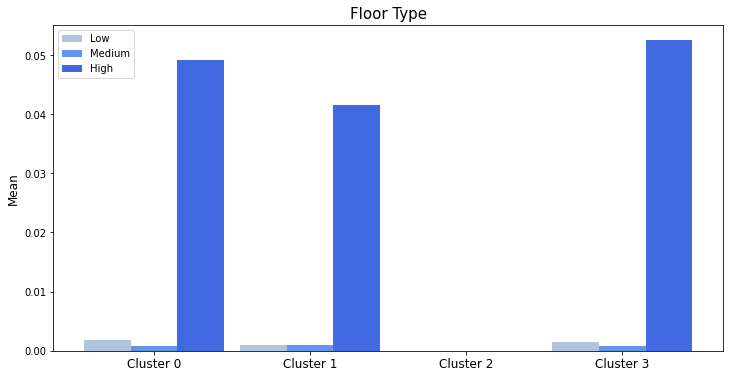

In [47]:
# a histogram with division by floor type
plt.figure(figsize=(12, 6))
# width of the bars
barwidth = 0.3

# height of the bars
y_low = means_cat['SRLowFloor']
y_medium = means_cat['SRMediumFloor']
y_high = means_cat['SRHighFloor']

bars = means_cat.index

# The x position of bars
x_low = np.arange(len(bars))
x_medium = [x + barwidth for x in x_low]
x_high = [x + barwidth for x in x_medium]

# Create bars
plt.bar(x_low, y_low, width=barwidth, label='Low', color='lightsteelblue')
plt.bar(x_medium, y_medium, width=barwidth, label='Medium', color='cornflowerblue')
plt.bar(x_high, y_high, width=barwidth, label='High', color='royalblue')

# Create names on the x-axis
plt.xticks([x + barwidth for x in range(len(y_low))], ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'], fontsize=12)

plt.title('Floor Type', fontsize=15)
plt.ylabel('Mean', fontsize=12)
plt.legend()
 
# Show graphic
plt.show()

Customers from clusters 0, 1, 3 usually ask for rooms on high floors, while customers from cluster 2 probably do not specify floor type when they book a room (perhaps that's why customers from this cluster have 0 value for all floor types). It can be explained with the fact that customers from the second cluster usually use corporate bookings (companies often do not specify a lot of subleties when they book rooms in hotels for group business trips - they specify only basic features instead).

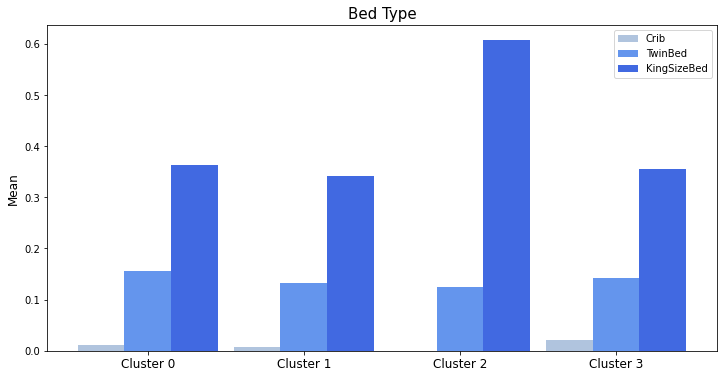

In [46]:
# a histogram with division by bed type
plt.figure(figsize=(12, 6))
# width of the bars
barwidth = 0.3

# height of the bars
y_crib = means_cat['SRCrib']
y_twin = means_cat['SRTwinBed']
y_king = means_cat['SRKingSizeBed']

bars = means_cat.index

# The x position of bars
x_crib = np.arange(len(bars))
x_twin = [x + barwidth for x in x_crib]
x_king = [x + barwidth for x in x_twin]

# Create bars
plt.bar(x_crib, y_crib, width=barwidth, label='Crib', color='lightsteelblue')
plt.bar(x_twin, y_twin, width=barwidth, label='TwinBed', color='cornflowerblue')
plt.bar(x_king, y_king, width=barwidth, label='KingSizeBed', color='royalblue')

# Create names on the x-axis
plt.xticks([x + barwidth for x in range(len(y_crib))], ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'], fontsize=12)

plt.title('Bed Type', fontsize=15)
plt.ylabel('Mean', fontsize=12)
plt.legend()
 
# Show graphic
plt.show()

There is no significant difference between clusters when it comes to bed type - all customers often ask for king size bed (especially the second cluster).

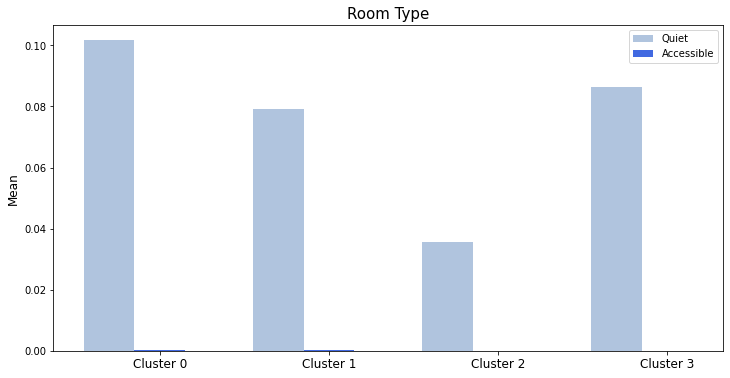

In [49]:
# a histogram with division by room type
plt.figure(figsize=(12, 6))
# width of the bars
barwidth = 0.3

# height of the bars
y_quiet = means_cat['SRQuietRoom']
y_accessible = means_cat['SRAccessibleRoom']

bars = means_cat.index

# The x position of bars
x_quiet = np.arange(len(bars))
x_accessible = [x + barwidth for x in x_quiet]

# Create bars
plt.bar(x_quiet, y_quiet, width=barwidth, label='Quiet', color='lightsteelblue')
plt.bar(x_accessible, y_accessible, width=barwidth, label='Accessible', color='royalblue')

# Create names on the x-axis
plt.xticks([x + barwidth for x in range(len(y_quiet))], ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'], fontsize=12)

plt.title('Room Type', fontsize=15)
plt.ylabel('Mean', fontsize=12)
plt.legend()
 
# Show graphic
plt.show()

All customers often ask for quiet room, cluster 0 - most often, cluster 2 - least of all.

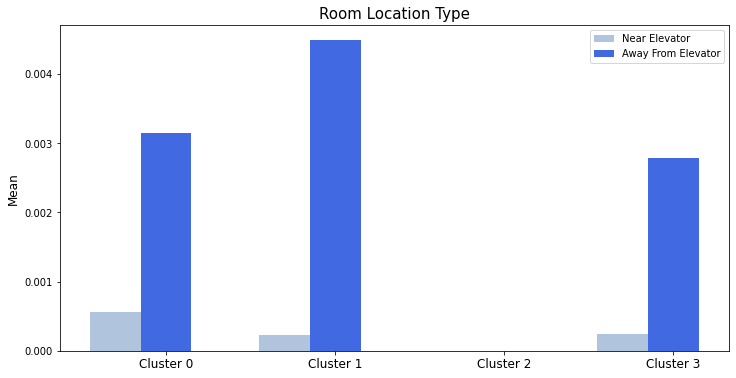

In [50]:
# a histogram with division by room location type
plt.figure(figsize=(12, 6))
# width of the bars
barwidth = 0.3

# height of the bars
y_near = means_cat['SRNearElevator']
y_away = means_cat['SRAwayFromElevator']

bars = means_cat.index

# The x position of bars
x_near = np.arange(len(bars))
x_away = [x + barwidth for x in x_near]

# Create bars
plt.bar(x_near, y_near, width=barwidth, label='Near Elevator', color='lightsteelblue')
plt.bar(x_away, y_away, width=barwidth, label='Away From Elevator', color='royalblue')

# Create names on the x-axis
plt.xticks([x + barwidth for x in range(len(y_near))], ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'], fontsize=12)

plt.title('Room Location Type', fontsize=15)
plt.ylabel('Mean', fontsize=12)
plt.legend()
 
# Show graphic
plt.show()

Customers from clusters 0, 1, 3 usually ask for room located away from elevator, while customers from cluster 2 do not specify location when they book a room.

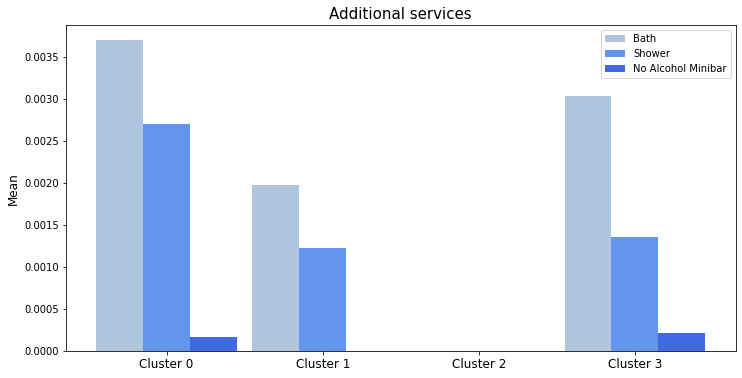

In [51]:
# a histogram with division by use of additional services
plt.figure(figsize=(12, 6))
# width of the bars
barwidth = 0.3

# height of the bars
y_bath = means_cat['SRBathtub']
y_shower = means_cat['SRShower']
y_minibar = means_cat['SRNoAlcoholInMiniBar']

bars = means_cat.index

# The x position of bars
x_bath = np.arange(len(bars))
x_shower = [x + barwidth for x in x_bath]
x_minibar = [x + barwidth for x in x_shower]

# Create bars
plt.bar(x_bath, y_bath, width=barwidth, label='Bath', color='lightsteelblue')
plt.bar(x_shower, y_shower, width=barwidth, label='Shower', color='cornflowerblue')
plt.bar(x_minibar, y_minibar, width=barwidth, label='No Alcohol Minibar', color='royalblue')

# Create names on the x-axis
plt.xticks([x + barwidth for x in range(len(y_bath))], ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'], fontsize=12)

plt.title('Additional services', fontsize=15)
plt.ylabel('Mean', fontsize=12)
plt.legend()
 
# Show graphic
plt.show()

Customers from clusters 0, 1, 3 often book rooms with bath and sometimes with shower, while customers from cluster 2 do not ask for any additional services when they book a room.

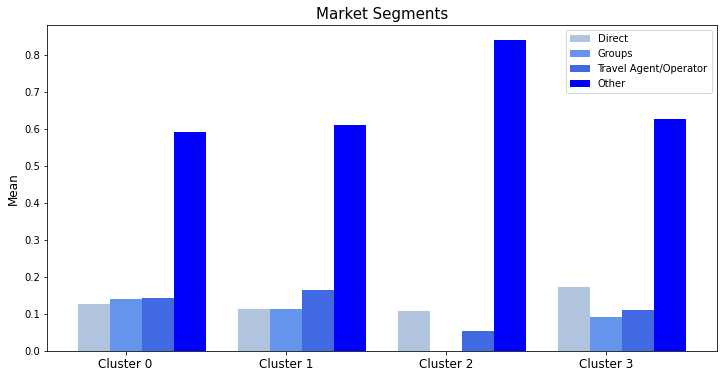

In [57]:
# a histogram with division by market segments
plt.figure(figsize=(12, 6))
# width of the bars
barwidth = 0.2

# height of the bars
y_direct = means_cat['MarketSegment_Direct']
y_groups = means_cat['MarketSegment_Groups']
y_agent = means_cat['MarketSegment_Travel Agent/Operator']
y_other = means_cat['MarketSegment_Other']

bars = means_cat.index

# The x position of bars
x_direct = np.arange(len(bars))
x_groups = [x + barwidth for x in x_direct]
x_agent = [x + barwidth for x in x_groups]
x_other = [x + barwidth for x in x_agent]

# Create bars
plt.bar(x_direct, y_direct, width=barwidth, label='Direct', color='lightsteelblue')
plt.bar(x_groups, y_groups, width=barwidth, label='Groups', color='cornflowerblue')
plt.bar(x_agent, y_agent, width=barwidth, label='Travel Agent/Operator', color='royalblue')
plt.bar(x_other, y_other, width=barwidth, label='Other', color='blue')

# Create names on the x-axis
plt.xticks([x + barwidth for x in range(len(y_direct))], ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'], fontsize=12)

plt.title('Market Segments', fontsize=15)
plt.ylabel('Mean', fontsize=12)
plt.legend()
 
# Show graphic
plt.show()

There is no significant difference between clusters when it comes to market segments.

To sum up, it can be concluded that clusters differ significantly when it comes to numerical features (such as number of canceled bookings, average lead time, expenses, etc.), but at the same time there is no significant difference between clusters when it comes to categorical features (the exceptions are nationality and distribution channels).

# Hotel customer segmentation conclusions

With the help of unsupervised machine learning, hotel's customers were divided into 4 clusters.

**Customers that belong to cluster 0 usually:**

    - prefer early booking
    - their lodging and other expenses are above average
    - they book more nights than average
    - multinational
    - make bookings via travel agents

**Customers that belong to cluster 1 usually:**

    - have been clients of the hotel for a long time
    - have average lodging and other expenses
    - haven't made any bookings for a long time
    - multinational
    - make bookings via travel agents

**Customers that belong to cluster 2 usually:**

    - very often make bookings but do not check-in to stay at the hotel
    - often cancel bookings
    - when they make a checked-in booking (which ends up with a staying), they stay for a long time
    - spend more money on lodging and other expenses than all other customers
    - Portuguese
    - use corporate booking

**Customers that belong to cluster 3 usually:**

    - prefer late booking
    - spend few money on lodging and other expenses
    - make few bookings
    - book few nights
    - multinational
    - make bookings via travel agents